### Visualize the `active_matter` dataset

In [2]:
import glob

import h5py
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# print the list of paths of files in the training set
set_path = "train"
paths = sorted(glob.glob(f"data/{set_path}/*.hdf5"))
print(paths)

['data/train/active_matter_L_10.0_zeta_1.0_alpha_-1.0.hdf5', 'data/train/active_matter_L_10.0_zeta_1.0_alpha_-2.0.hdf5', 'data/train/active_matter_L_10.0_zeta_1.0_alpha_-3.0.hdf5', 'data/train/active_matter_L_10.0_zeta_1.0_alpha_-4.0.hdf5', 'data/train/active_matter_L_10.0_zeta_1.0_alpha_-5.0.hdf5', 'data/train/active_matter_L_10.0_zeta_11.0_alpha_-1.0.hdf5', 'data/train/active_matter_L_10.0_zeta_11.0_alpha_-2.0.hdf5', 'data/train/active_matter_L_10.0_zeta_11.0_alpha_-3.0.hdf5', 'data/train/active_matter_L_10.0_zeta_11.0_alpha_-4.0.hdf5', 'data/train/active_matter_L_10.0_zeta_11.0_alpha_-5.0.hdf5', 'data/train/active_matter_L_10.0_zeta_13.0_alpha_-1.0.hdf5', 'data/train/active_matter_L_10.0_zeta_13.0_alpha_-2.0.hdf5', 'data/train/active_matter_L_10.0_zeta_13.0_alpha_-3.0.hdf5', 'data/train/active_matter_L_10.0_zeta_13.0_alpha_-4.0.hdf5', 'data/train/active_matter_L_10.0_zeta_13.0_alpha_-5.0.hdf5', 'data/train/active_matter_L_10.0_zeta_15.0_alpha_-1.0.hdf5', 'data/train/active_matter_L_

In [4]:
# select the first path
p = paths[0]

# print the first layer of keys
with h5py.File(p, "r") as f:
    print(f.keys())

<KeysViewHDF5 ['boundary_conditions', 'dimensions', 'scalars', 't0_fields', 't1_fields', 't2_fields']>


In [5]:
# In 'boundary_conditions' is stored the information about the boundary conditions:
with h5py.File(p, "r") as f:
    print("print bc available:", f["boundary_conditions"].keys())
    print("print attributes of the bc:",f["boundary_conditions"]["x_periodic"].attrs.keys())
    print("get the bc type:", f["boundary_conditions"]["x_periodic"].attrs["bc_type"])

print bc available: <KeysViewHDF5 ['x_periodic', 'y_periodic']>
print attributes of the bc: <KeysViewHDF5 ['associated_dims', 'associated_fields', 'bc_type', 'sample_varying', 'time_varying']>
get the bc type: PERIODIC


In [6]:
# Reminder: 't0_fields', 't1_fields', 't2_fields' are respectively scalar fields, vector fields and tensor fields
# print the different fields available in the dataset
with h5py.File(p, "r") as f:
    print("t0_fields:", f["t0_fields"].keys())
    print("t1_fields:", f["t1_fields"].keys())
    print("t2_fields:", f["t2_fields"].keys())

t0_fields: <KeysViewHDF5 ['concentration']>
t1_fields: <KeysViewHDF5 ['velocity']>
t2_fields: <KeysViewHDF5 ['D', 'E']>


In [7]:
# The data is stored in the shape (n_trajectories, n_timesteps, x, y, z)
# Get the first t0_field and store it in a numpy array
traj = 0  # select the trajectory
with h5py.File(p, "r") as f:
    D = f["t2_fields"]["D"][traj,:]# HDF5 datasets can be sliced (and streamed) like a numpy array
    print("shape of the selected t0_field: ", D.shape)
# D is a Tensor field (t2_field), the last two dimension are organized as follow: [0,0] <=> xx, [1,1] <=> yy, [0,1] <=> xy, [1,0] <=> yx (the last two are equal if the tensor is symmetric)

shape of the selected t0_field:  (81, 256, 256, 2, 2)


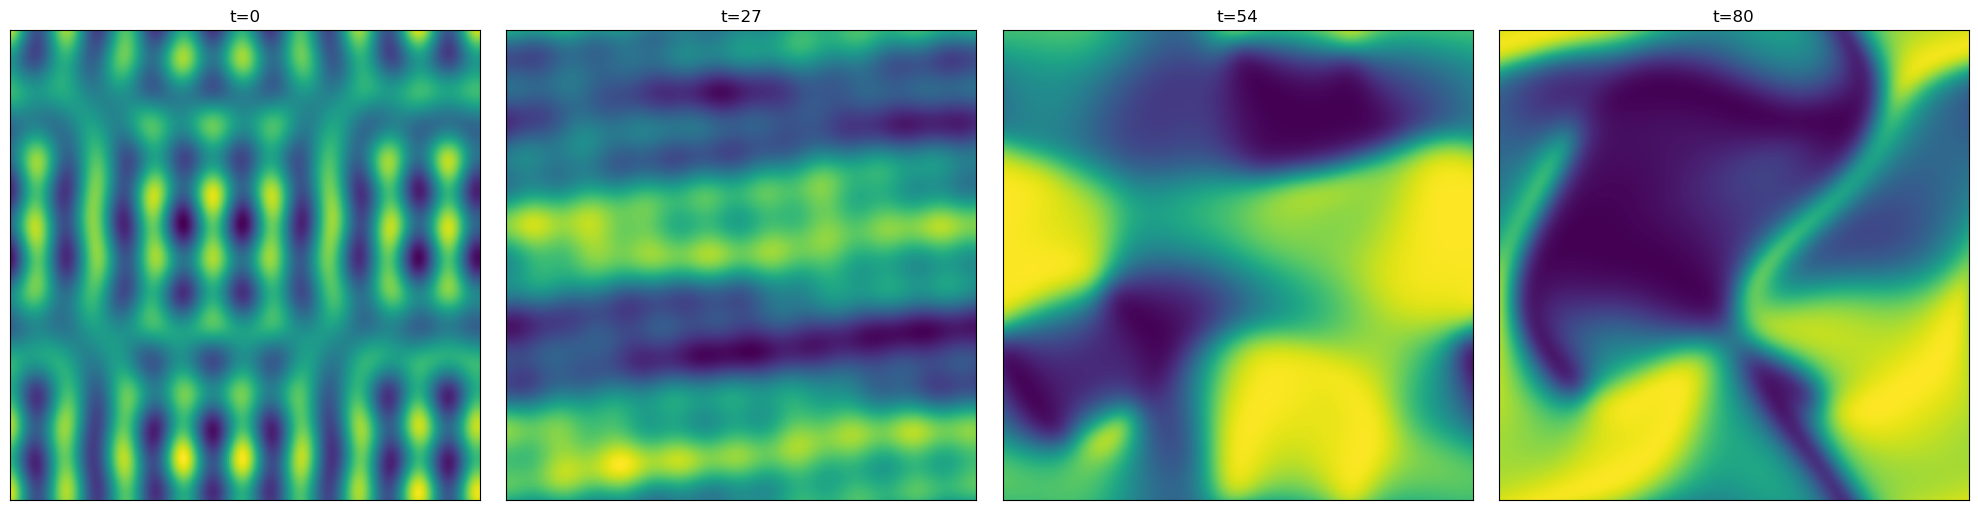

In [11]:
traj_toplot = D[:, :, :, 1, 0]  # select the D_xy component
cmap = "viridis"
# field is now of shape (n_timesteps, x, y). Let's do a subplot to plot it at t= 0, t= T/3, t= 2T/3 and t= T:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
T = traj_toplot.shape[0]

# same colorbar for all subplots:
normalize_plots = False
cmap = "viridis"

if normalize_plots:
    vmin = np.nanmin(traj_toplot)
    vmax = np.nanmax(traj_toplot)
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    for i, t in enumerate([0, T // 3, (2 * T) // 3, T - 1]):
        axs[i].imshow(traj_toplot[t], cmap=cmap, norm=norm)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_title(f"t={t}")
else:
    for i, t in enumerate([0, T // 3, (2 * T) // 3, T - 1]):
        axs[i].imshow(traj_toplot[t], cmap=cmap)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_title(f"t={t}")
plt.tight_layout()
